In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('/content/drive/MyDrive/c2_dataset.csv')
df

,Anho,1P,T,Asistencia,Cod.Car.Sec,Cant.Materias,Recursante,Cant. C1,CGF,CIV,IND,MEC,ELE,MCT,ECA,Abandono
0,2019,0,0,1,MCT-PLS13,5,0,1,0,0,0,0,0,1,0,1
1,2016,5,3,1,ELE-PLS13,3,0,1,0,0,0,0,1,0,0,1
2,2017,7,2,0,ELE-PLS13,5,0,1,0,0,0,0,1,0,0,1
3,2019,0,0,1,ELE-PLS13,4,0,1,0,0,0,0,1,0,0,1
4,2022,0,0,1,ELE-PLS13,3,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,2022,14,3,1,CIV-PLS13,5,1,3,0,1,0,0,0,0,0,0
3078,2021,15,3,1,IND-PLS13,6,0,2,0,0,1,0,0,0,0,0
3079,2022,14,6,1,IND-PLS13,6,1,2,0,0,1,0,0,0,0,0
3080,2016,0,0,0,MCT-PLS13,4,0,1,0,0,0,0,0,1,0,1


 Cargo mis features elegidos en X, y mi etiqueta "resultado" en Y

In [3]:
X = df[['Anho','1P','T','Asistencia','Cant.Materias','Recursante','Cant. C1','CGF','CIV','IND','MEC','ELE','MCT','ECA'] ]
Y = df['Abandono']

Elegimos el modelo de regresion logistica ya que se trata de un problema de clasificacion binaria.


In [4]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=50)

In [5]:
from numpy.core.numeric import binary_repr
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)


model = Sequential()
model.add(Dense(1,activation ='sigmoid',input_shape = (14,)))

model.compile(loss='binary_crossentropy', optimizer ='adam',metrics= ['Accuracy'])



Hago mi primer entrenamiento

In [14]:
history = model.fit(Xtrain,Ytrain,epochs = 150, validation_split=0.2)


Epoch 1/150
62/62 [==============================] - 1s 11ms/step - loss: 0.3594 - Accuracy: 0.8514 - val_loss: 0.4140 - val_Accuracy: 0.7890
Epoch 2/150
62/62 [==============================] - 0s 5ms/step - loss: 0.3675 - Accuracy: 0.8479 - val_loss: 0.4975 - val_Accuracy: 0.7627
Epoch 3/150
62/62 [==============================] - 0s 5ms/step - loss: 0.3717 - Accuracy: 0.8458 - val_loss: 0.4074 - val_Accuracy: 0.8032
Epoch 4/150
62/62 [==============================] - 0s 7ms/step - loss: 0.3584 - Accuracy: 0.8474 - val_loss: 0.4035 - val_Accuracy: 0.8134
Epoch 5/150
62/62 [==============================] - 0s 6ms/step - loss: 0.3805 - Accuracy: 0.8438 - val_loss: 0.4042 - val_Accuracy: 0.8174
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.3599 - Accuracy: 0.8509 - val_loss: 0.4179 - val_Accuracy: 0.7809
Epoch 7/150
62/62 [==============================] - 0s 5ms/step - loss: 0.3691 - Accuracy: 0.8484 - val_loss: 0.4163 - val_Accuracy: 0.7850
Epoch 8/150


[Reviso los resultados



In [15]:
print("Evaluate on test data")
results = model.evaluate(Xtest, Ytest, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 0s 3ms/step - loss: 0.3546 - Accuracy: 0.8412
test loss, test acc: [0.35455653071403503, 0.8411669135093689]


Tengo una precision del 84%,Es buena pero mejorable

Hago una comparacion a lo largo de las epochs entre los elementos 'loss' que son las perdidas en el conjunto de entrenamiento y 'val_loss' que son las perdidas en el conjunto de validacion

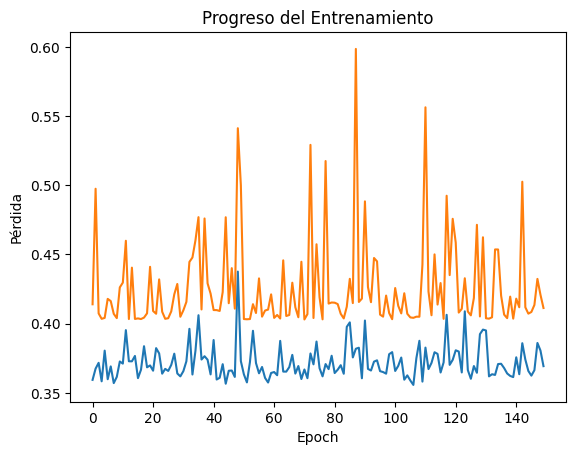

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Progreso del Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.show()

como se puede ver en el grafico de arriba, Los valores de 'val_loss' van aumentando y se van alejando de los valores de 'loss' a lo largo de las epochs.

Esto se puede deber a un overfitting, por lo que el modelo debe tener menos iteraciones.

A simple vista parece que un valor optimo de iteraciones es entre 0 y 50, por lo que elijo 35

In [17]:
history = model.fit(Xtrain,Ytrain,epochs = 35, validation_split=0.2)


Epoch 1/35
62/62 [==============================] - 0s 3ms/step - loss: 0.3825 - Accuracy: 0.8392 - val_loss: 0.5071 - val_Accuracy: 0.7606
Epoch 2/35
62/62 [==============================] - 0s 2ms/step - loss: 0.3597 - Accuracy: 0.8509 - val_loss: 0.4106 - val_Accuracy: 0.7992
Epoch 3/35
62/62 [==============================] - 0s 3ms/step - loss: 0.3618 - Accuracy: 0.8484 - val_loss: 0.4054 - val_Accuracy: 0.8093
Epoch 4/35
62/62 [==============================] - 0s 2ms/step - loss: 0.3603 - Accuracy: 0.8448 - val_loss: 0.4035 - val_Accuracy: 0.8114
Epoch 5/35
62/62 [==============================] - 0s 2ms/step - loss: 0.3700 - Accuracy: 0.8458 - val_loss: 0.4072 - val_Accuracy: 0.8256
Epoch 6/35
62/62 [==============================] - 0s 3ms/step - loss: 0.3592 - Accuracy: 0.8534 - val_loss: 0.4042 - val_Accuracy: 0.8174
Epoch 7/35
62/62 [==============================] - 0s 3ms/step - loss: 0.3602 - Accuracy: 0.8479 - val_loss: 0.4043 - val_Accuracy: 0.8073
Epoch 8/35
62/62 [==

volvemos a evaluar el modelo

In [18]:
print("Evaluate on test data")
results = model.evaluate(Xtest, Ytest, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 0s 3ms/step - loss: 0.3695 - Accuracy: 0.8622
test loss, test acc: [0.36952903866767883, 0.8622366189956665]


Esta vez tenemos una precision del 86%, mucho mejor

Volvemos a evaluar el grafico de 'loss' vs 'val_loss'

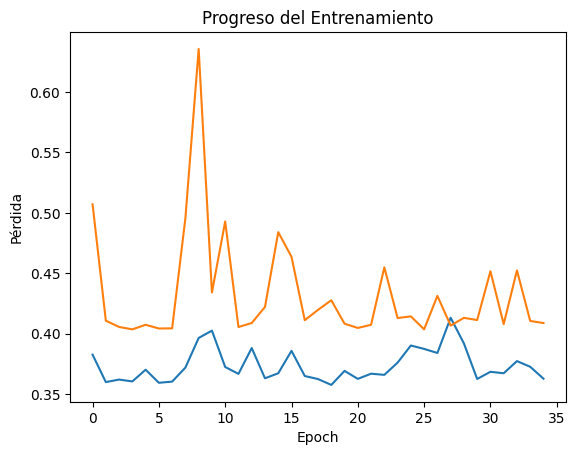

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Progreso del Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.show()

esta vez los valores estan mas cercanos, por lo que no hay overfitting

In [20]:
predict = model.predict(Xtest)
predict = (predict>=0.5).astype(int)

20/20 [==============================] - 0s 1ms/step


In [21]:
from sklearn import metrics
print(metrics.confusion_matrix(Ytest,predict))

[[435  16]
 [ 69  97]]


In [22]:
print(metrics.accuracy_score(Ytest,predict))

0.8622366288492707
